In [2]:
!ls ../

LICENSE    data    notebooks   requirements.txt  src.egg-info	      utils
Makefile   docs    references  setup.py		 test_environment.py
README.md  models  reports     src		 tox.ini


(573, 428)


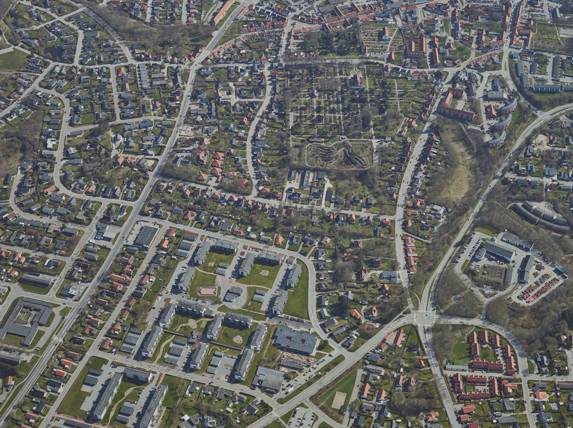

In [4]:
with Image.open (mypath + df['filename'][626]) as im:
    size = (im.size[0]//20,im.size[1]//20)
    print(size)
    resized = im.resize((size))
    display(resized)

In [22]:
def resize_img(im):
    size = (im.shape[0]//10,im.shape[1]//10)
    return cv2.resize(im, dsize=size, interpolation=cv2.INTER_CUBIC)

In [1]:


########
# TODO #
########

## Use PIL to open and display images
## Save ratings properly

def sort_images_interactive():
    classifications = {} # define an empty dictionary
    # Set a flag to show that polling is active.
    polling_active = True
    i = 0
    while polling_active:
        #Show the image - not working
        #image = mpimg.imread("Images/" + onlyfiles[i])
        #pic_show = plt.imshow(image)
        #plt.show()
        
        #Ask for rating
        rating = input("\n Classification:")
        classifications[onlyfiles[i]] = rating # Store the response in the dictionary:
        #Find out if anyone else is going to take the poll.
        i += 1
        print(i)
        clear_output(wait=True)    
        if i > len(onlyfiles):
            polling_active = False
            print('Thank you for your response')
            
    # Save your result
    df = pd.DataFrame(classifications.items(), columns=['Image', 'Rating'])
    df.to_csv("Johannes_rating.csv")

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import clear_output

### CLASSIFICATIONS:
##
## 1 = City
## 2 = Mixed
## 3 = Countryside

mypath = "../data/raw/images/"
imgnames = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])

fname = 'classification.csv'

## Load previously classifications into dataframe
if isfile(fname):
    df = pd.read_csv(fname)
else:
    classif = np.zeros(6195)
    d = {'filename':imgnames, 'classification':classif}
    df = pd.DataFrame(data=d)

In [10]:
missing = df[df.classification == 0]

## Run the loop on the missing classifications
polling = True
i = missing.index[0]
while polling:
    
    if i > len(df):
        polling = False
        df.to_csv("classification.csv", index=False)
        print('done')
        
    name = missing['filename'][i]
    print(f'Image {i}/{len(df)}')
 
    with Image.open (mypath + name) as im:
        size = (im.size[0]//20,im.size[1]//20)
        resized = im.resize((size))
        display(resized)
        
    rating = input('\n Classification: ')
    clear_output()
    
    ## Save current classifications
    if rating == 'stop':
        print('saving')
        df.to_csv("classification.csv", index=False)
        break
    ## Go back in case of mistakes
    if rating == 'back':
        i -= 1
        continue
    
    df['classification'][i] = int(rating)
    i += 1


IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
test_df = pd.read_csv('classification.csv')
test_df[test_df.classification != 0]

,filename,classification
0,2019_81_01_1_0033_00000494.jpg,3.0
1,2019_81_01_1_0033_00000495.jpg,3.0
2,2019_81_01_1_0033_00000496.jpg,3.0
3,2019_81_01_1_0033_00000497.jpg,3.0
4,2019_81_01_1_0033_00000498.jpg,3.0
...,...,...
6190,2019_85_53_5_0043_00125755.jpg,3.0
6191,2019_85_53_5_0043_00125758.jpg,3.0
6192,2019_85_53_5_0043_00125802.jpg,3.0
6193,2019_85_53_5_0043_00125805.jpg,3.0


In [27]:
df.to_csv("classification.csv", index=False)

In [26]:
np.unique(df.classification, return_counts=True, return_index=True)

(array([1., 2., 3.]), array([14,  5,  0]), array([3254, 1561, 1380]))

In [17]:
df[df.classification > 3]

,filename,classification
5270,2019_85_45_2_0048_00013907.jpg,22.0
5337,2019_85_45_5_0048_00013912.jpg,22.0


In [25]:
df.loc[5270]

filename          2019_85_45_2_0048_00013907.jpg
classification                               2.0
Name: 5270, dtype: object

## Abnormalities

Images (0-index): 2229 (light), 2950 (shadows), 5894 (clouds?)

## Visualize classes

/appl/matplotlib/3.6.0-numpy-1.23.3-python-3.9.14/lib/python3.9/site-packages/Pillow-9.2.0-py3.9-linux-x86_64.egg/PIL/Image.py:3035: DecompressionBombWarning: Image size (98458284 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


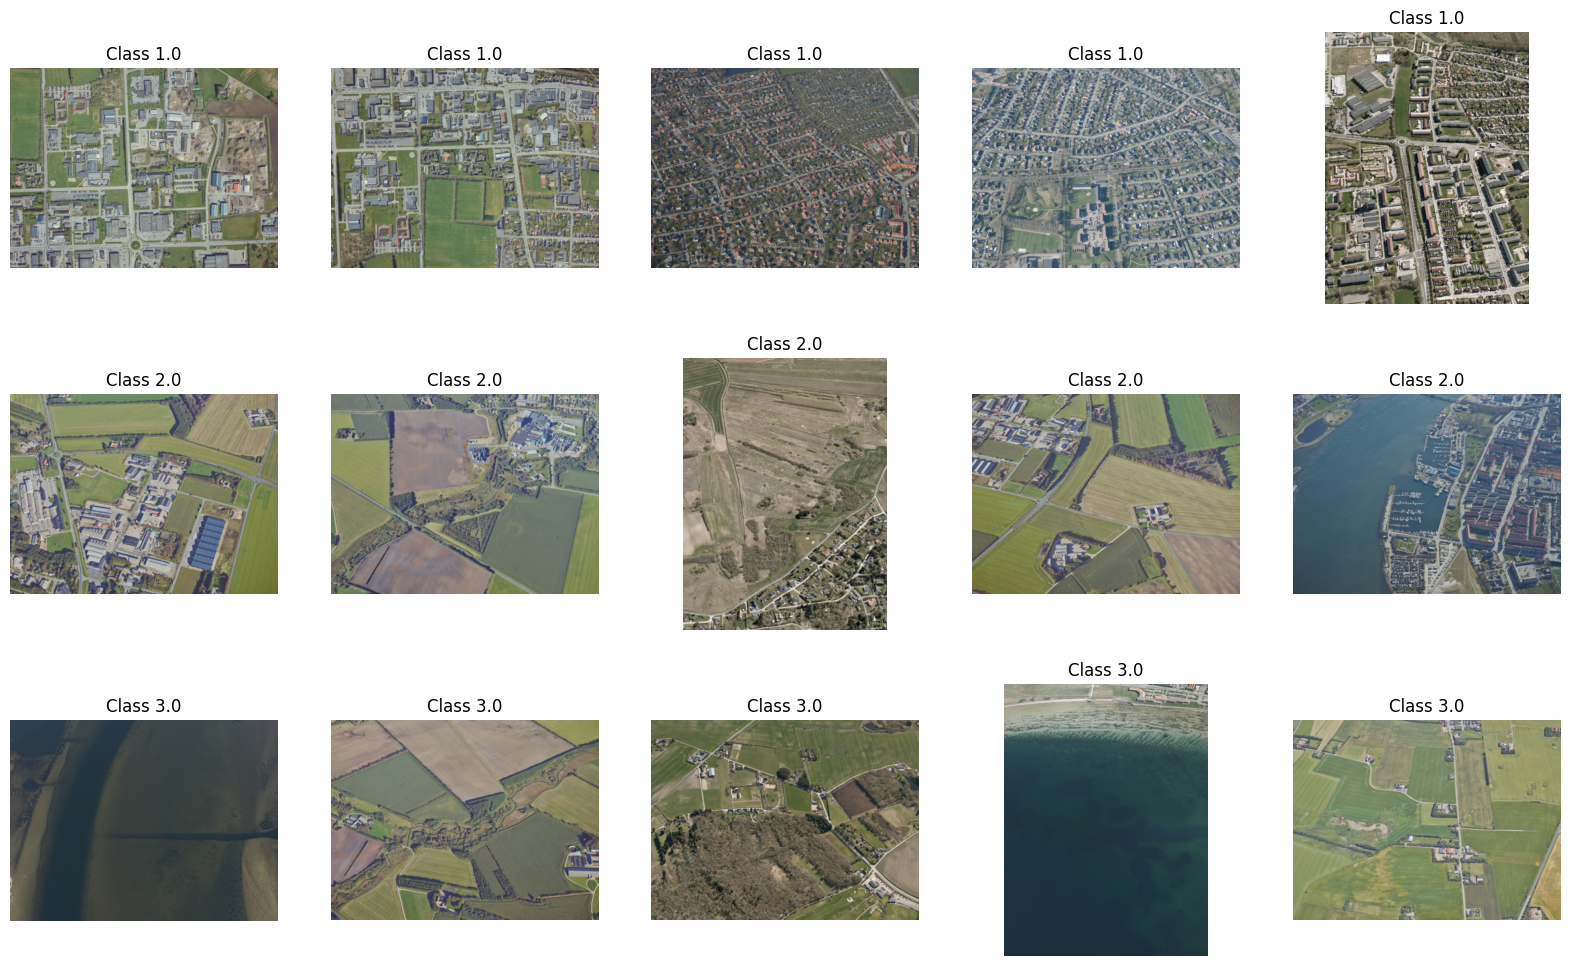

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the filenames from the pandas dataframe
df = pd.read_csv('classification.csv')
classifications = df.loc[df['classification'] != 0, 'classification'].unique()

# Select 5 random filenames from each of the classifications 1-3
random_filenames = []
for i in range(1, 4):
    class_filenames = df.loc[(df['classification'] == i) & (df['classification'] != 0), 'filename'].tolist()
    random_class_filenames = np.random.choice(class_filenames, 5, replace=False)
    random_filenames.extend(random_class_filenames)

# Create a subplot with 3 rows and 5 columns
fig, ax = plt.subplots(3, 5, figsize=(20, 12))

# Loop through each filename and plot the corresponding image
for i, filename in enumerate(random_filenames):
    img_path = os.path.join('../data/raw/images/', filename)
    img = Image.open(img_path)
    
    # Create a thumbnail version of the image
    img.thumbnail((400, 400))
    
    # Determine the row and column of the subplot to place the image in
    row = i // 5
    col = i % 5

    ax[row, col].imshow(img)
    ax[row, col].set_title(f'Class {df.loc[df["filename"] == filename, "classification"].item()}')
    ax[row, col].axis('off')
    
# Show the plot
plt.show()


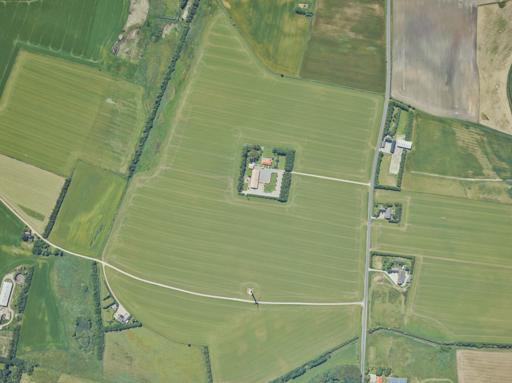

In [63]:
from IPython.display import Image, display
from PIL import Image as PILImage
import io

# Load the image
pil_image = PILImage.open(mypath + imgnames[0])

# Resize the image to a thumbnail size
thumbnail_size = (512, 512)
pil_image.thumbnail(thumbnail_size)

with io.BytesIO() as output:
    pil_image.save(output, format="JPEG")
    contents = output.getvalue()

# Display the thumbnail
display(Image(contents))


# Split folders (train/test)

In [4]:
import os
import splitfolders

In [ ]:
data_folder = '../data/raw/images'
output_folder = '../data/'

if (not os.path.exists('output/')):
    splitfolders.ratio(data_folder, output="output", seed=1337, ratio=(.8, .2), group_prefix=None, move=False)
    os.rename('output/val', 'output/validation')

# Image degradation (creating LR images)

## Blur kernel

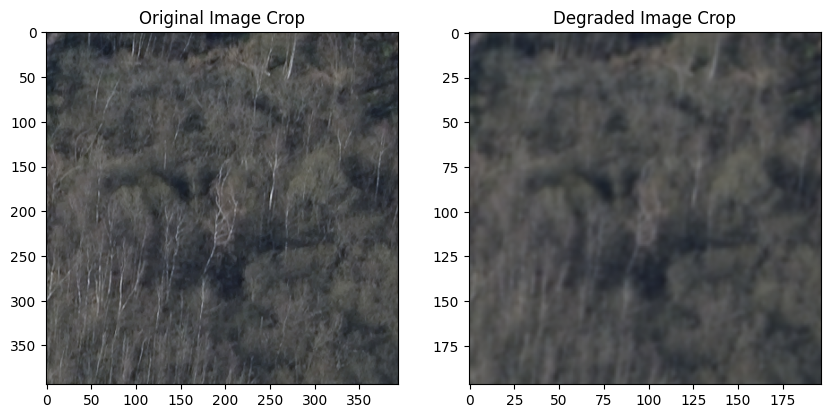

In [119]:
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy.ndimage import gaussian_filter, zoom
from PIL import Image

# Load an image as a numpy array
mypath = "../data/raw/images/"
imgnames = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])
image = np.array(Image.open(mypath + imgnames[3000]))

# Define the standard deviation of the Gaussian kernel
sigma = 2

# Generate a Gaussian kernel using the standard deviation
kernel_size = int(sigma * 3) * 2 + 1
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        x, y = i - kernel_size//2, j - kernel_size//2
        kernel[i, j] = np.exp(-(x**2 + y**2)/(2*sigma**2))
kernel /= np.sum(kernel)

# Convolve each color channel of the image with the Gaussian kernel
blurred_image = np.zeros_like(image)
for i in range(3):  # iterate over color channels
    blurred_image[:,:,i] = gaussian_filter(image[:,:,i], sigma=sigma)

# Compute the new dimensions
height, width = image.shape[:2]
new_height, new_width = height // 2, width // 2

# Downsample the image by a factor of 2 using bicubic interpolation
downsampled_img = zoom(blurred_image, (new_height / height, new_width / width, 1), order=3)

# Add AWGN to the image
mean = 0
sigma = np.random.randint(1,26)/255
noise = np.random.normal(mean, sigma, downsampled_img.shape)
noisy_img = np.clip((downsampled_img + noise), 0, 255)
    
# Get a random 394x394 crop from the images
crop_size = 394
x = np.random.randint(0, image.shape[1] - crop_size + 1)
y = np.random.randint(0, image.shape[0] - crop_size + 1)
x2, y2, crop_size2 = x//2, y//2, crop_size//2
image_crop = image[y:y+crop_size, x:x+crop_size]
degraded_image_crop = noisy_img[y2:y2+crop_size2, x2:x2+crop_size2]

# Display the original and blurred images side by side
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_crop)
axs[0].set_title('Original Image Crop')
axs[1].imshow(degraded_image_crop/255)
axs[1].set_title('Degraded Image Crop')
plt.show()

In [15]:
!pip install opencv-python

     |████████████████████████████████| 61.8 MB 148 kB/s eta 0:00:01
You should consider upgrading via the '/zhome/c2/a/117760/Thesis/thesis_venv/bin/python -m pip install --upgrade pip' command.
